In [1]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the project categories and session export data
d1 = pd.read_excel("C:\\Users\\project_categories.xlsx")
d2 = pd.read_excel("C:\\Users\\session_export.xlsx")

#select the relevant columns only
d1.drop(columns = ['created_at', 'updated_at', 'enabled', 'international', 'slug'], axis = 1, inplace = True)
d2.drop(columns = ['id', 'created_at', 'updated_at', 'description', 'consultant_id', 'nonprofit_id', 'scheduled_for', 'time_slots', 'organization_id', 'conference_line_id', 'partner_organization_id', 'archived'], axis = 1, inplace = True)

#merge the datasets on id variable
d3 = pd.merge(d2, d1, how = 'left', left_on = 'project_category_id', right_on = 'id')

In [9]:
d1.head()

,id,group_slug,name
0,1,business,Accounting & Finance
1,3,business,Evaluation
2,5,business,Program Design
3,6,business,Research
4,7,hr,HR Management


In [13]:
d2.head()

,state,project_category_id
0,cancelled,20.0
1,completed,20.0
2,cancelled,20.0
3,completed,10.0
4,completed,20.0


In [12]:
d3.head()

,state,project_category_id,id,group_slug,name
0,cancelled,20.0,20.0,it,Website development
1,completed,20.0,20.0,it,Website development
2,cancelled,20.0,20.0,it,Website development
3,completed,10.0,10.0,marketing,Marketing Strategy
4,completed,20.0,20.0,it,Website development


In [36]:
#drop unnecessay columns
d4 = d3.drop(columns = ['project_category_id', 'id'], axis = 1)

#group the data by group slug and name and state
d4.groupby(['group_slug', 'name', 'state']).size()

group_slug  name                  state          
business    Accounting & Finance  applied              9
                                  cancelled           18
                                  completed           41
                                  draft               26
                                  expired             68
                                  missed               4
                                  npo_rescheduled      3
                                  pending             20
                                  published            1
            Business Planning     applied              8
                                  cancelled           18
                                  completed           70
                                  draft               26
                                  expired             57
                                  missed               1
                                  pbc_rescheduled      4
                                  pend

In [42]:
#create a new dataset of values grouped slugs and state and save the data to local machine
d_group = d4.groupby(['group_slug', 'state']).size().reset_index()
d_group.to_csv("d_group.csv")

In [48]:
#create a new dataset of values grouped slugs and aame and state and save the data to local machine
d_group2 = d4.groupby(['group_slug','name', 'state']).size().reset_index()
d_group2.to_csv("d_group2.csv")

In [52]:
#read the session export data
data = pd.read_excel("C:\\Users\\session_export.xlsx")
data.head()

,id,created_at,updated_at,state,description,consultant_id,nonprofit_id,scheduled_for,time_slots,organization_id,conference_line_id,project_category_id,partner_organization_id,archived
0,102,2017-01-10 19:04:55.571,2017-01-10 19:05:13.720,cancelled,test.,NaN,2036,NaT,"{""2017-01-13 16:00:00"",""2017-01-13 18:00:00"",""...",239,NaN,20.0,NaN,f
1,110,2017-03-29 14:36:50.901,2017-03-31 18:00:00.402,completed,We're creating new websites for a couple of ou...,130022.0,144136,2017-03-31 16:00:00,"{""2017-03-29 20:00:00"",""2017-03-30 20:00:00"",""...",4218,5.0,20.0,NaN,f
2,60,2016-03-17 16:08:47.427,2016-03-30 14:52:12.539,cancelled,The TASH website is a Wordpress website that w...,11865.0,11682,2016-03-31 19:00:00,"{""2016-03-28 15:00:00"",""2016-03-28 20:00:00"",""...",2153,1.0,20.0,NaN,f
3,95,2016-08-24 19:37:31.044,2016-09-06 15:00:01.829,completed,We want to increase our online sales of tea an...,129767.0,131196,2016-09-06 13:00:00,"{""2016-08-30 14:00:00"",""2016-08-30 15:00:00"",""...",2933,2.0,10.0,NaN,f
4,53,2016-03-17 00:05:42.531,2016-03-24 16:00:01.854,completed,We are currently in the process of redesigning...,11412.0,9367,2016-03-24 14:00:00,"{""2016-03-23 15:00:00"",""2016-03-24 14:00:00"",""...",1370,1.0,20.0,NaN,f


In [121]:
#create a variable named count and set it to the count of time slots of the time_slots column

data['count'] = 0
for i in range(len(data)):
    count = 0
    created_date = data.iloc[i,1]
    time_slot = re.split(',',data.iloc[i,8].replace("{","").replace("}","").replace('"',""))
    
    for j in range(len(time_slot)):
        if time_slot[j]!='':
            session_date = datetime.strptime(time_slot[j],'%Y-%m-%d %H:%M:%S')
            if created_date > session_date:
                count=+1
            else:
                break
    data.loc[i,'count'] = count
    
    

In [124]:
data.describe()

,id,consultant_id,nonprofit_id,organization_id,conference_line_id,project_category_id,partner_organization_id,count
count,1665.000000,623.000000,1665.000000,1665.000000,625.000000,1660.000000,0.0,1665.000000
mean,960.714715,119543.778491,154597.100901,6459.753754,3.075200,9.595181,NaN,0.003003
std,527.625466,64421.586744,42170.557673,2287.879252,3.108989,6.101411,NaN,0.054734
min,34.000000,6.000000,1304.000000,48.000000,1.000000,1.000000,NaN,0.000000
25%,515.000000,81861.500000,154469.000000,5428.000000,1.000000,4.000000,NaN,0.000000
50%,938.000000,148214.000000,168654.000000,7071.000000,2.000000,10.000000,NaN,0.000000
75%,1419.000000,167335.500000,176948.000000,8294.000000,4.000000,14.000000,NaN,0.000000
max,1931.000000,183262.000000,183524.000000,9329.000000,32.000000,21.000000,NaN,1.000000


In [140]:
#create a grouped by column to count the unique counts
DC = data.groupby(['count']).size().reset_index(name = "Pre_session_counts")
DC.head()

,count,Pre_session_counts
0,0,1660
1,1,5


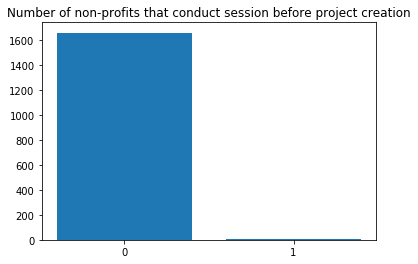

In [143]:
#plot the bar chart
plt.bar(DC['count'], DC['Pre_session_counts'], align = 'center')
plt.xticks(DC['count'])

plt.title('Number of non-profits that conduct session before project creation')
plt.show()